In [1]:
import numpy as np
import math
import copy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
from matplotlib.ticker import AutoMinorLocator
from matplotlib.colors import LinearSegmentedColormap  # colormapをカスタマイズする
import matplotlib.colors as colors
import matplotlib.patches as patches
import matplotlib.patheffects as pe
import B_JRM33 as BJRM
import B_equator as BEQ
import Leadangle_wave as LeadA
from TScmap import TScmap

# Color universal design
cud4 = ['#FF3300', '#FFF100', '#03AF7A', '#005AFF', '#4DC4FF', '#FF8082', '#F6AA00', '#990099', '#804000']
cud4bs = ['#FFCABF', '#FFFF80', '#D8F255', '#BFE4FF', '#FFCA80', '#77D9A8', '#C9ACE6', '#84919E']

# matplotlib フォント設定
fontname = 'Nimbus Sans'
plt.rcParams.update({'font.sans-serif': fontname,
                     'font.family': 'sans-serif',
                     'mathtext.fontset': 'custom',
                     'mathtext.rm': fontname,
                     'mathtext.it': fontname+':italic',
                     # 'mathtext.bf': 'Nimbus Sans:italic:bold',
                     'mathtext.bf': fontname+':bold'
                     })
params = {
    # 'lines.markersize': 1,
    # 'lines.linewidth': 1,
    'axes.linewidth': 2,
    'xtick.major.size': 5,
    'xtick.minor.size': 3.5,
    'xtick.major.width': 2.0,
    'xtick.minor.width': 1.25,
    'ytick.major.size': 5,
    'ytick.minor.size': 3,
    'ytick.major.width': 2.0,
    'ytick.minor.width': 1.25,
}
plt.rcParams.update(params)

In [2]:
# 定数
MOON = 'Europa'
MU0 = 1.26E-6            # 真空中の透磁率
AMU = 1.66E-27           # [kg]
RJ = 71492E+3            # JUPITER RADIUS [m]
C = 2.99792E+8           # 光速 [m/s]
OMGJ = 1.75868E-4        # 木星の自転角速度 [rad/s]

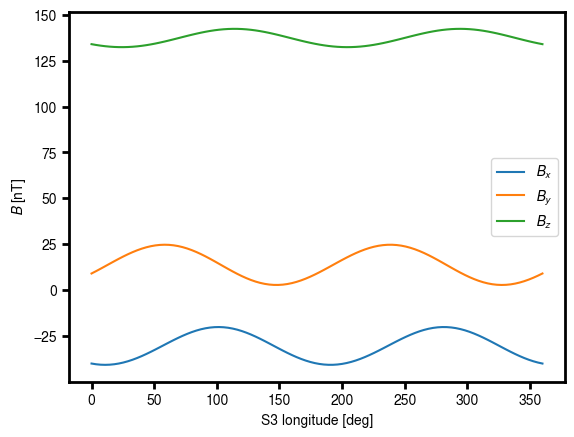

In [3]:
S3wlong = np.linspace(0,360,100)
phi = np.radians(360-S3wlong)
theta = np.radians(90)       # 自転赤道面
r = 9.4*RJ

Bx = np.zeros(S3wlong.size)
By = np.zeros(S3wlong.size)
Bz = np.zeros(S3wlong.size)

for i in range(S3wlong.size):
    x = r*math.cos(phi[i])*math.sin(theta)
    y = r*math.sin(phi[i])*math.sin(theta)
    z = r*math.cos(theta)

    Bcs = BJRM.B().BCS(x, y, z, 0)  # [nT]

    Bx[i] = Bcs[0]
    By[i] = Bcs[1]
    Bz[i] = Bcs[2]

fig, ax = plt.subplots()
ax.set_xlabel('S3 longitude [deg]')
ax.set_ylabel(r'$B$ [nT]')
ax.plot(S3wlong, Bx, label=r'$B_x$')
ax.plot(S3wlong, By, label=r'$B_y$')
ax.plot(S3wlong, Bz, label=r'$B_z$')
ax.legend()
plt.show()


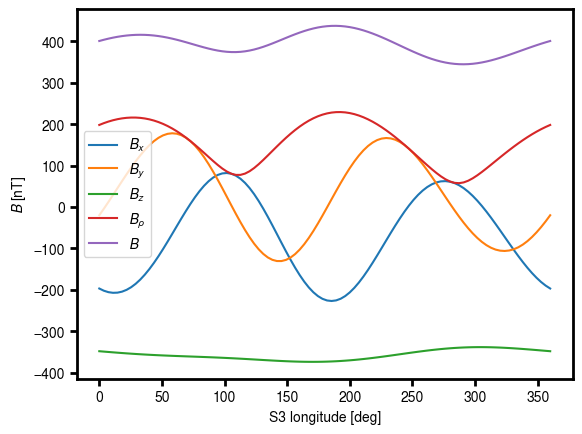

In [4]:
S3wlong = np.linspace(0,360,100)
phi = np.radians(360-S3wlong)
theta = np.radians(90)       # 自転赤道面
r = 9.4*RJ

B_x = np.zeros(S3wlong.size)
B_y = np.zeros(S3wlong.size)
B_z = np.zeros(S3wlong.size)

for i in range(S3wlong.size):
    x = r*math.cos(phi[i])*math.sin(theta)
    y = r*math.sin(phi[i])*math.sin(theta)
    z = r*math.cos(theta)

    Bv = BJRM.B().JRM33(r, theta, phi[i])*1E-9        # [T]
    Bx = Bv[0]*math.sin(theta)*math.cos(phi[i]) + Bv[1] * \
        math.cos(theta)*math.cos(phi[i]) - Bv[2]*math.sin(phi[i])
    By = Bv[0]*math.sin(theta)*math.sin(phi[i]) + Bv[1] * \
        math.cos(theta)*math.sin(phi[i]) + Bv[2]*math.cos(phi[i])
    Bz = Bv[0]*math.cos(theta) - Bv[1]*math.sin(theta)

    Bcs = BJRM.B().BCS(x, y, z, 0)  # [nT]
    Bx += Bcs[0]*1E-9   # [T]
    By += Bcs[1]*1E-9
    Bz += Bcs[2]*1E-9

    B_x[i] = Bx
    B_y[i] = By
    B_z[i] = Bz

fig, ax = plt.subplots()
ax.set_xlabel('S3 longitude [deg]')
ax.set_ylabel(r'$B$ [nT]')
# ax.set_ylim(-300,600)
ax.plot(S3wlong, B_x*1E+9, label=r'$B_x$')
ax.plot(S3wlong, B_y*1E+9, label=r'$B_y$')
ax.plot(S3wlong, B_z*1E+9, label=r'$B_z$')
ax.plot(S3wlong, np.sqrt(B_x**2 + B_y**2)*1E+9, label=r'$B_\rho$')
ax.plot(S3wlong, np.sqrt(B_x**2 + B_y**2 + B_z**2)*1E+9, label=r'$B$')
ax.legend()
plt.show()

# 磁場の形状

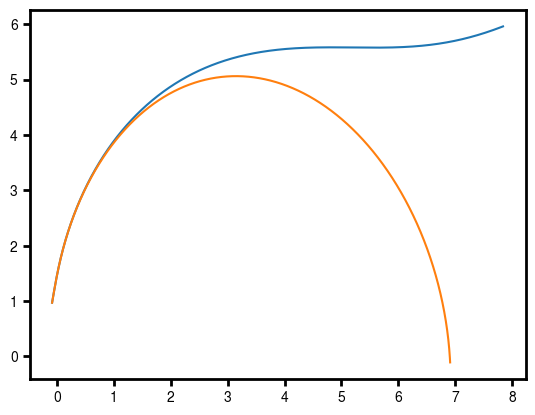

In [36]:
N = 20000

r = 1*RJ
theta = math.radians(14.5)     # [rad]
phi = math.radians(110)       # [rad]

x = r*math.sin(theta)*math.cos(phi)
y = r*math.sin(theta)*math.sin(phi)
z = r*math.cos(theta)

# x = 9.4*RJ
# y = 0
# z = 0
# r = math.sqrt(x**2 + y**2 + z**2)
# theta = math.acos(z/r)
# phi = math.atan2(y, x)

x_arr = np.zeros(N)
y_arr = np.zeros(N)
z_arr = np.zeros(N)

xC_arr = np.zeros(N)
yC_arr = np.zeros(N)
zC_arr = np.zeros(N)

ds = 60000      # [m]

for i in range(N):
    Bv = BJRM.B().JRM33(r, theta, phi)*1E-9        # [T]
    Bx = Bv[0]*math.sin(theta)*math.cos(phi) + Bv[1] * \
        math.cos(theta)*math.cos(phi) - Bv[2]*math.sin(phi)
    By = Bv[0]*math.sin(theta)*math.sin(phi) + Bv[1] * \
        math.cos(theta)*math.sin(phi) + Bv[2]*math.cos(phi)
    Bz = Bv[0]*math.cos(theta) - Bv[1]*math.sin(theta)

    Bcs = BJRM.B().BCS(x, y, z, 0)  # [nT]
    Bx += Bcs[0]*1E-9   # [T]
    By += Bcs[1]*1E-9
    Bz += Bcs[2]*1E-9

    B0 = math.sqrt(Bx**2 + By**2 + Bz**2)

    dx = ds*Bx/B0
    dy = ds*By/B0
    dz = ds*Bz/B0

    x += dx
    y += dy
    z += dz

    # 座標更新
    r = math.sqrt(x**2 + y**2 + z**2)
    theta = math.acos(z/r)
    phi = math.atan2(y, x)

    x_arr[i] = x
    y_arr[i] = y
    z_arr[i] = z


r = 1*RJ
theta = math.radians(14.5)     # [rad]
phi = math.radians(110)       # [rad]

x = r*math.sin(theta)*math.cos(phi)
y = r*math.sin(theta)*math.sin(phi)
z = r*math.cos(theta)

for i in range(N):
    Bv = BJRM.B().JRM33(r, theta, phi)*1E-9        # [T]
    Bx = Bv[0]*math.sin(theta)*math.cos(phi) + Bv[1] * \
        math.cos(theta)*math.cos(phi) - Bv[2]*math.sin(phi)
    By = Bv[0]*math.sin(theta)*math.sin(phi) + Bv[1] * \
        math.cos(theta)*math.sin(phi) + Bv[2]*math.cos(phi)
    Bz = Bv[0]*math.cos(theta) - Bv[1]*math.sin(theta)

    B0 = math.sqrt(Bx**2 + By**2 + Bz**2)

    dx = ds*Bx/B0
    dy = ds*By/B0
    dz = ds*Bz/B0

    x += dx
    y += dy
    z += dz

    # 座標更新
    r = math.sqrt(x**2 + y**2 + z**2)
    theta = math.acos(z/r)
    phi = math.atan2(y, x)

    xC_arr[i] = x
    yC_arr[i] = y
    zC_arr[i] = z

fig, ax = plt.subplots()
ax.plot(x_arr/RJ,z_arr/RJ)
ax.plot(xC_arr/RJ,zC_arr/RJ)
plt.show()

-79.70412169055626 171.40939756410907
54.56145712596142 179.63313067261026


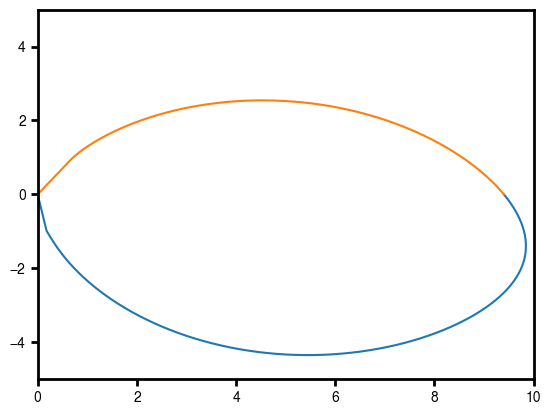

In [76]:
N = 35000

S3wlon0 = 194   # [deg]

phi0 = math.radians(360-S3wlon0)
x = 9.4*RJ*math.cos(phi0)
y = 9.4*RJ*math.sin(phi0)
z = 0
r = math.sqrt(x**2 + y**2 + z**2)
theta = math.acos(z/r)
phi = math.atan2(y, x)

x1_arr = np.zeros(N)
y1_arr = np.zeros(N)
z1_arr = np.zeros(N)

ds = 30000      # [m]
for i in range(N):
    Bv = BJRM.B().JRM33(r, theta, phi)*1E-9        # [T]
    Bx = Bv[0]*math.sin(theta)*math.cos(phi) + Bv[1] * \
        math.cos(theta)*math.cos(phi) - Bv[2]*math.sin(phi)
    By = Bv[0]*math.sin(theta)*math.sin(phi) + Bv[1] * \
        math.cos(theta)*math.sin(phi) + Bv[2]*math.cos(phi)
    Bz = Bv[0]*math.cos(theta) - Bv[1]*math.sin(theta)

    Bcs = BJRM.B().BCS(x, y, z, 0)  # [nT]
    Bx += Bcs[0]*1E-9   # [T]
    By += Bcs[1]*1E-9
    Bz += Bcs[2]*1E-9

    B0 = math.sqrt(Bx**2 + By**2 + Bz**2)

    dx = ds*Bx/B0
    dy = ds*By/B0
    dz = ds*Bz/B0

    x += dx
    y += dy
    z += dz

    # 座標更新
    r = math.sqrt(x**2 + y**2 + z**2)
    theta = math.acos(z/r)
    phi = math.atan2(y, x)

    x1_arr[i] = x
    y1_arr[i] = y
    z1_arr[i] = z

    if r<RJ:
        print(90-math.degrees(theta), math.degrees(phi))
        break



x = 9.4*RJ*math.cos(phi0)
y = 9.4*RJ*math.sin(phi0)
z = 0

r = math.sqrt(x**2 + y**2 + z**2)
theta = math.acos(z/r)
phi = math.atan2(y, x)
x2_arr = np.zeros(N)
y2_arr = np.zeros(N)
z2_arr = np.zeros(N)

ds = -30000      # [m]
for i in range(N):
    Bv = BJRM.B().JRM33(r, theta, phi)*1E-9        # [T]
    Bx = Bv[0]*math.sin(theta)*math.cos(phi) + Bv[1] * \
        math.cos(theta)*math.cos(phi) - Bv[2]*math.sin(phi)
    By = Bv[0]*math.sin(theta)*math.sin(phi) + Bv[1] * \
        math.cos(theta)*math.sin(phi) + Bv[2]*math.cos(phi)
    Bz = Bv[0]*math.cos(theta) - Bv[1]*math.sin(theta)

    Bcs = BJRM.B().BCS(x, y, z, 0)  # [nT]
    Bx += Bcs[0]*1E-9   # [T]
    By += Bcs[1]*1E-9
    Bz += Bcs[2]*1E-9

    B0 = math.sqrt(Bx**2 + By**2 + Bz**2)

    dx = ds*Bx/B0
    dy = ds*By/B0
    dz = ds*Bz/B0

    x += dx
    y += dy
    z += dz

    # 座標更新
    r = math.sqrt(x**2 + y**2 + z**2)
    theta = math.acos(z/r)
    phi = math.atan2(y, x)

    x2_arr[i] = x
    y2_arr[i] = y
    z2_arr[i] = z

    if r<RJ:
        print(90-math.degrees(theta), math.degrees(phi))
        break

fig, ax = plt.subplots()
ax.set_xlim(0,10)
ax.set_ylim(-5,5)
ax.plot(np.sqrt(x1_arr**2+y1_arr**2)/RJ,z1_arr/RJ)
ax.plot(np.sqrt(x2_arr**2+y2_arr**2)/RJ,z2_arr/RJ)
plt.show()

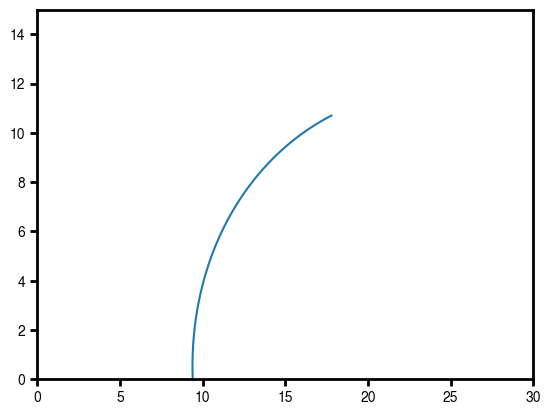

In [80]:
N = 35000

S3wlon0 = 104   # [deg]

phi0 = math.radians(360-S3wlon0)
x = 9.4*RJ*math.cos(phi0)
y = 9.4*RJ*math.sin(phi0)
z = 0
r = math.sqrt(x**2 + y**2 + z**2)
theta = math.acos(z/r)
phi = math.atan2(y, x)

x1_arr = np.zeros(N)
y1_arr = np.zeros(N)
z1_arr = np.zeros(N)

ds = 30000      # [m]
for i in range(N):
    Bv = BJRM.B().JRM33(r, theta, phi)*1E-9        # [T]
    Bx = Bv[0]*math.sin(theta)*math.cos(phi) + Bv[1] * \
        math.cos(theta)*math.cos(phi) - Bv[2]*math.sin(phi)
    By = Bv[0]*math.sin(theta)*math.sin(phi) + Bv[1] * \
        math.cos(theta)*math.sin(phi) + Bv[2]*math.cos(phi)
    Bz = Bv[0]*math.cos(theta) - Bv[1]*math.sin(theta)

    Bcs = BJRM.B().BCS(x, y, z, 0)  # [nT]
    Bx = Bcs[0]*1E-9   # [T]
    By = Bcs[1]*1E-9
    Bz = Bcs[2]*1E-9

    B0 = math.sqrt(Bx**2 + By**2 + Bz**2)

    dx = ds*Bx/B0
    dy = ds*By/B0
    dz = ds*Bz/B0

    x += dx
    y += dy
    z += dz

    # 座標更新
    r = math.sqrt(x**2 + y**2 + z**2)
    theta = math.acos(z/r)
    phi = math.atan2(y, x)

    x1_arr[i] = x
    y1_arr[i] = y
    z1_arr[i] = z

    if r<RJ:
        print(90-math.degrees(theta), math.degrees(phi))
        break



x = 9.4*RJ*math.cos(phi0)
y = 9.4*RJ*math.sin(phi0)
z = 0

r = math.sqrt(x**2 + y**2 + z**2)
theta = math.acos(z/r)
phi = math.atan2(y, x)
x2_arr = np.zeros(N)
y2_arr = np.zeros(N)
z2_arr = np.zeros(N)

ds = -30000      # [m]
for i in range(N):
    Bv = BJRM.B().JRM33(r, theta, phi)*1E-9        # [T]
    Bx = Bv[0]*math.sin(theta)*math.cos(phi) + Bv[1] * \
        math.cos(theta)*math.cos(phi) - Bv[2]*math.sin(phi)
    By = Bv[0]*math.sin(theta)*math.sin(phi) + Bv[1] * \
        math.cos(theta)*math.sin(phi) + Bv[2]*math.cos(phi)
    Bz = Bv[0]*math.cos(theta) - Bv[1]*math.sin(theta)

    Bcs = BJRM.B().BCS(x, y, z, 0)  # [nT]
    Bx = Bcs[0]*1E-9   # [T]
    By = Bcs[1]*1E-9
    Bz = Bcs[2]*1E-9

    B0 = math.sqrt(Bx**2 + By**2 + Bz**2)

    dx = ds*Bx/B0
    dy = ds*By/B0
    dz = ds*Bz/B0

    x += dx
    y += dy
    z += dz

    # 座標更新
    r = math.sqrt(x**2 + y**2 + z**2)
    theta = math.acos(z/r)
    phi = math.atan2(y, x)

    x2_arr[i] = x
    y2_arr[i] = y
    z2_arr[i] = z

    if r<RJ:
        print(90-math.degrees(theta), math.degrees(phi))
        break

fig, ax = plt.subplots()
ax.set_xlim(0,30)
ax.set_ylim(0,15)
ax.plot(np.sqrt(x1_arr**2+y1_arr**2)/RJ,z1_arr/RJ)
ax.plot(np.sqrt(x2_arr**2+y2_arr**2)/RJ,z2_arr/RJ)
plt.show()